In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline

<h2> Read Data from CSV

In [2]:
df = pd.read_csv('heart.csv')
df.head(3)

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1

The dataset contains the following features:
1. age(in years)
2. sex: (1 = male; 0 = female)
3. cp: chest pain type
4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)
5. chol: serum cholestoral in mg/dl
6. fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7. restecg: resting electrocardiographic results
8. thalach: maximum heart rate achieved
9. exang: exercise induced angina (1 = yes; 0 = no)
10. oldpeak: ST depression induced by exercise relative to rest
11. slope: the slope of the peak exercise ST segment
12. ca: number of major vessels (0-3) colored by flourosopy
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
14. target: 1 or 0

<h2>Dataset Features

In [3]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

<h2>Dataset Size 

In [4]:
print('# of rows: ', df.shape[0])
print('# of columns: ', df.shape[1])

('# of rows: ', 303)
('# of columns: ', 14)


<h2>Get Dataset Description

In [5]:
df.describe()

age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.905161    0.469794    1.161075    0.616226    1.022606   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

             thal      target  
count  303.000000  303.000000  
mean     2.313531    0.544554  
std      0.612277    0.498835  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

**The features described in the above data set are**

1. Count = Number of NoN-empty rows in a feature
2. Mean  = Mean value of that feature
3. Std   = Standard Deviation Value of that feature
4. Min   = Minimum value of that feature
5. 25%, 50%, and 75% = Percentile/quartile of each features.
6. Max   = Maximum value of that feature.

<h2>Plot Features

<h3>thalach

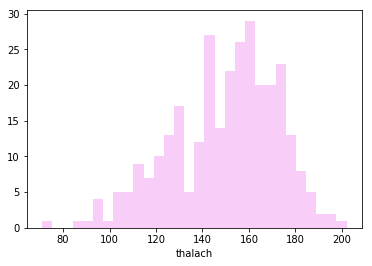

In [6]:
sns.distplot(df['thalach'],kde=False,bins=30,color='violet')

<h3>chol

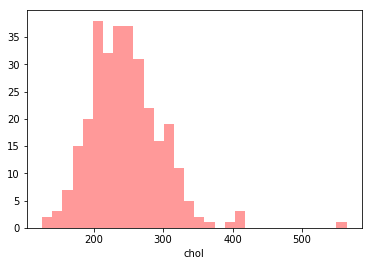

In [7]:
sns.distplot(df['chol'],kde=False,bins=30,color='red')
plt.show()

<h3>trestbps

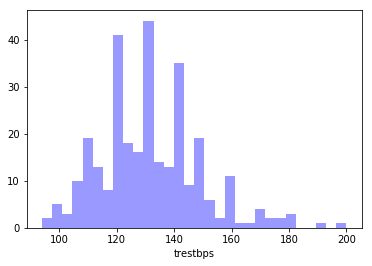

In [8]:
sns.distplot(df['trestbps'],kde=False,bins=30,color='blue')
plt.show()

<h3>age vs target

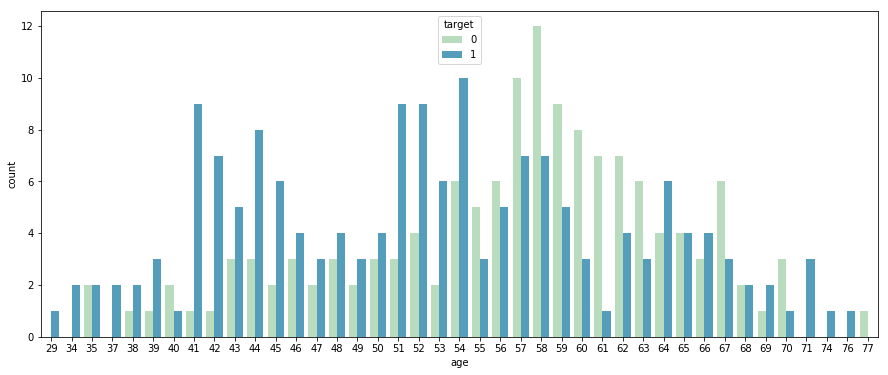

In [9]:
plt.figure(figsize=(15,6))
sns.countplot(x='age',data = df, hue = 'target',palette='GnBu')
plt.show()

<h2>Scatter Plots

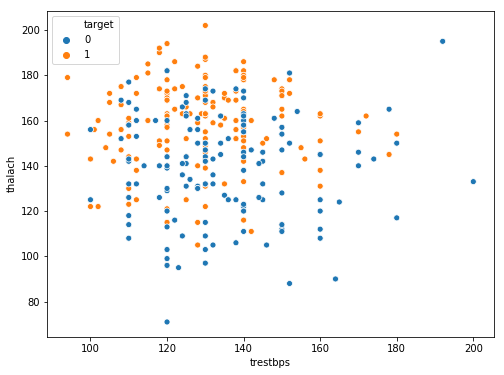

In [10]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='trestbps',y='thalach',data=df, hue='target')
plt.show()

<h3>thalach vs. chol

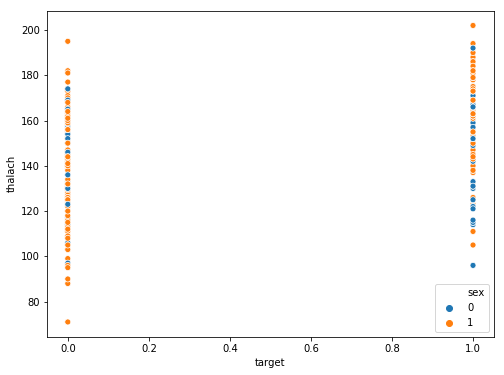

In [11]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='target',y='thalach',data=df, hue='sex')
plt.show()

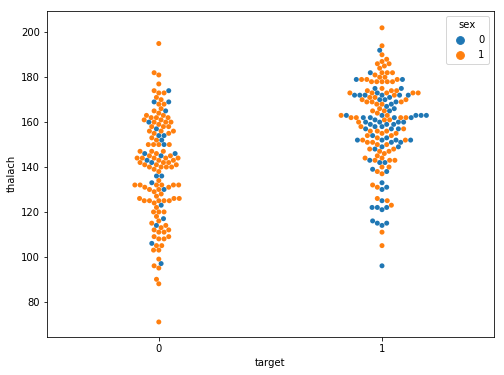

In [12]:
plt.figure(figsize=(8,6))
sns.swarmplot(x='target',y='thalach',data=df, hue='sex')
plt.show()

<h3>Box Plots

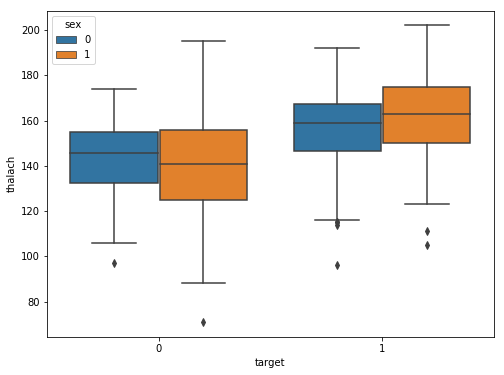

In [13]:
plt.figure(figsize=(8,6))
sns.boxplot(x='target',y='thalach',data=df, hue='sex')
plt.show()

<h3>Violin Plot

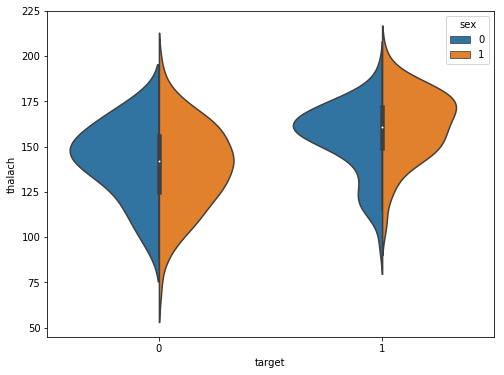

In [14]:
plt.figure(figsize=(8,6))
sns.violinplot(x='target',y='thalach',data=df, hue='sex', split=True)
plt.show()

<h1>Data Cleaning

<h2>NULL Values

<h3>Check NULL Values

In [15]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<h3>Fill NULL Values

In [16]:
df.fillna(method='ffill')

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
5     57    1   0       140   192    0        1      148      0      0.4   
6     56    0   1       140   294    0        0      153      0      1.3   
7     44    1   1       120   263    0        1      173      0      0.0   
8     52    1   2       172   199    1        1      162      0      0.5   
9     57    1   2       150   168    0        1      174      0      1.6   
10    54    1   0       140   239    0        1      160      0      1.2   
11    48    0   2       130   275    0        1      139      0      0.2   
12    49    1   1       130   266    0        1      171      0      0.6   
13    64    1   3       110   211    0        0      144      1      1.8   
14    58    0   3       150   283    1        0      162      0      1.0   
15    50    0   2       120   219    0        1      158      0      1.6   
16    58    0   2       120   340    0        1      172      0      0.0   
17    66    0   3       150   226    0        1      114      0      2.6   
18    43    1   0       150   247    0        1      171      0      1.5   
19    69    0   3       140   239    0        1      151      0      1.8   
20    59    1   0       135   234    0        1      161      0      0.5   
21    44    1   2       130   233    0        1      179      1      0.4   
22    42    1   0       140   226    0        1      178      0      0.0   
23    61    1   2       150   243    1        1      137      1      1.0   
24    40    1   3       140   199    0        1      178      1      1.4   
25    71    0   1       160   302    0        1      162      0      0.4   
26    59    1   2       150   212    1        1      157      0      1.6   
27    51    1   2       110   175    0        1      123      0      0.6   
28    65    0   2       140   417    1        0      157      0      0.8   
29    53    1   2       130   197    1        0      152      0      1.2   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
273   58    1   0       100   234    0        1      156      0      0.1   
274   47    1   0       110   275    0        0      118      1      1.0   
275   52    1   0       125   212    0        1      168      0      1.0   
276   58    1   0       146   218    0        1      105      0      2.0   
277   57    1   1       124   261    0        1      141      0      0.3   
278   58    0   1       136   319    1        0      152      0      0.0   
279   61    1   0       138   166    0        0      125      1      3.6   
280   42    1   0       136   315    0        1      125      1      1.8   
281   52    1   0       128   204    1        1      156      1      1.0   
282   59    1   2       126   218    1        1      134      0      2.2   
283   40    1   0       152   223    0        1      181      0      0.0   
284   61    1   0       140   207    0        0      138      1      1.9   
285   46    1   0       140   311    0        1      120      1      1.8   
286   59    1   3       134   204    0        1      162      0      0.8   
287   57    1   1       154   232    0        0      164      0      0.0   
288   57    1   0       110   335    0        1      143      1      3.0   
289   55    0   0       128   205    0        2      130      1      2.0   
290   61    1   0       148   203    0        1      161      0      0.0   
291   58    1   0       114   318    0        2      140      0      4.4   
292   58    0   0       170   225    1        0      146      1      2.8   
293   67    1   2       152   212    0        0      

<h3>Some Other Methods of Filling Null Values</h3>

**df.fillna(0)** - fill with "0" <br>
**df.fillna(method='bfill')** - fill with before value <br>
**df.fillna({'age': 10, 'sex': 1, 'cp': 1, 'trestbps': 130})** - fill with given values


<h3>Drop NULL Value Columns

In [17]:
df.dropna()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
5     57    1   0       140   192    0        1      148      0      0.4   
6     56    0   1       140   294    0        0      153      0      1.3   
7     44    1   1       120   263    0        1      173      0      0.0   
8     52    1   2       172   199    1        1      162      0      0.5   
9     57    1   2       150   168    0        1      174      0      1.6   
10    54    1   0       140   239    0        1      160      0      1.2   
11    48    0   2       130   275    0        1      139      0      0.2   
12    49    1   1       130   266    0        1      171      0      0.6   
13    64    1   3       110   211    0        0      144      1      1.8   
14    58    0   3       150   283    1        0      162      0      1.0   
15    50    0   2       120   219    0        1      158      0      1.6   
16    58    0   2       120   340    0        1      172      0      0.0   
17    66    0   3       150   226    0        1      114      0      2.6   
18    43    1   0       150   247    0        1      171      0      1.5   
19    69    0   3       140   239    0        1      151      0      1.8   
20    59    1   0       135   234    0        1      161      0      0.5   
21    44    1   2       130   233    0        1      179      1      0.4   
22    42    1   0       140   226    0        1      178      0      0.0   
23    61    1   2       150   243    1        1      137      1      1.0   
24    40    1   3       140   199    0        1      178      1      1.4   
25    71    0   1       160   302    0        1      162      0      0.4   
26    59    1   2       150   212    1        1      157      0      1.6   
27    51    1   2       110   175    0        1      123      0      0.6   
28    65    0   2       140   417    1        0      157      0      0.8   
29    53    1   2       130   197    1        0      152      0      1.2   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
273   58    1   0       100   234    0        1      156      0      0.1   
274   47    1   0       110   275    0        0      118      1      1.0   
275   52    1   0       125   212    0        1      168      0      1.0   
276   58    1   0       146   218    0        1      105      0      2.0   
277   57    1   1       124   261    0        1      141      0      0.3   
278   58    0   1       136   319    1        0      152      0      0.0   
279   61    1   0       138   166    0        0      125      1      3.6   
280   42    1   0       136   315    0        1      125      1      1.8   
281   52    1   0       128   204    1        1      156      1      1.0   
282   59    1   2       126   218    1        1      134      0      2.2   
283   40    1   0       152   223    0        1      181      0      0.0   
284   61    1   0       140   207    0        0      138      1      1.9   
285   46    1   0       140   311    0        1      120      1      1.8   
286   59    1   3       134   204    0        1      162      0      0.8   
287   57    1   1       154   232    0        0      164      0      0.0   
288   57    1   0       110   335    0        1      143      1      3.0   
289   55    0   0       128   205    0        2      130      1      2.0   
290   61    1   0       148   203    0        1      161      0      0.0   
291   58    1   0       114   318    0        2      140      0      4.4   
292   58    0   0       170   225    1        0      146      1      2.8   
293   67    1   2       152   212    0        0      

<h2>Outlier Removal

<h3>Using Z-Score Approach

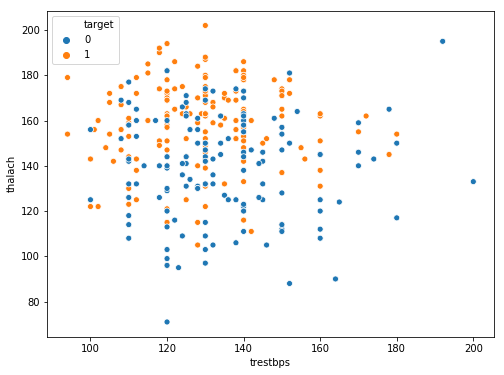

In [18]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='trestbps',y='thalach',data=df, hue='target')
plt.show()

In [19]:
df2 = df[(np.abs(stats.zscore(df['thalach'])) < 3)]
df2 = df2[(np.abs(stats.zscore(df2['trestbps'])) < 3)]

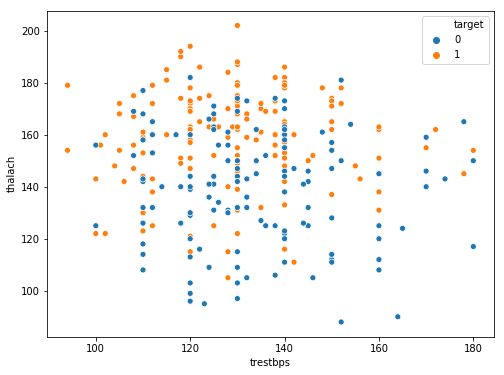

In [20]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='trestbps',y='thalach',data=df2, hue='target')
plt.show()

<h3>Using Quantile Approach

In [21]:
q = df['thalach'].quantile(0.99)
df3 = df[df['thalach'] < q]

q = df3['trestbps'].quantile(0.99)
df3 = df3[df3['trestbps'] < q]

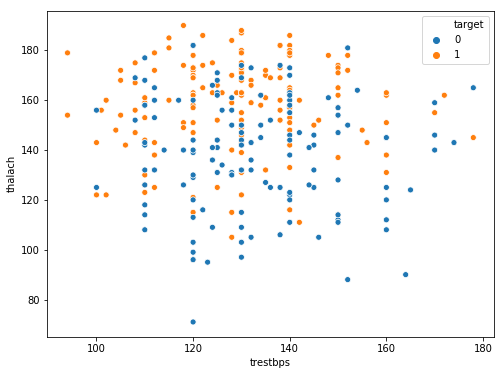

In [22]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='trestbps',y='thalach',data=df3, hue='target')
plt.show()

In [23]:
df3.shape[0]

295

<h3>Encoding Categorical Variables

In [24]:
from sklearn import preprocessing

In [25]:
df_1 = pd.read_csv('heart-mod.csv')
df_1.head(3)

age     sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0   63    male   3       145   233    1        0      150      0      2.3   
1   37    male   2       130   250    0        1      187      0      3.5   
2   41  female   1       130   204    0        0      172      0      1.4   

   slope  ca  thal  target  
0      0   0     1       1  
1      0   0     2       1  
2      2   0     2       1

In [26]:
label_encoder = preprocessing.LabelEncoder()

In [27]:
df_1['sex'] = label_encoder.fit_transform(df_1['sex'])
df_1.head(3)

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1

<h3>Data Normalization

In [28]:
min_max_scaler = preprocessing.MinMaxScaler()
df_scaled = min_max_scaler.fit_transform(df)

/home/deshanig/.local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [29]:
df.head(5)

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [30]:
pd.DataFrame(df_scaled).head(5)

0    1         2         3         4    5    6         7    8   \
0  0.708333  1.0  1.000000  0.481132  0.244292  1.0  0.0  0.603053  0.0   
1  0.166667  1.0  0.666667  0.339623  0.283105  0.0  0.5  0.885496  0.0   
2  0.250000  0.0  0.333333  0.339623  0.178082  0.0  0.0  0.770992  0.0   
3  0.562500  1.0  0.333333  0.245283  0.251142  0.0  0.5  0.816794  0.0   
4  0.583333  0.0  0.000000  0.245283  0.520548  0.0  0.5  0.702290  1.0   

         9    10   11        12   13  
0  0.370968  0.0  0.0  0.333333  1.0  
1  0.564516  0.0  0.0  0.666667  1.0  
2  0.225806  1.0  0.0  0.666667  1.0  
3  0.129032  1.0  0.0  0.666667  1.0  
4  0.096774  1.0  0.0  0.666667  1.0

<h2>Feature Engineering

<h3>Correlation Analysis

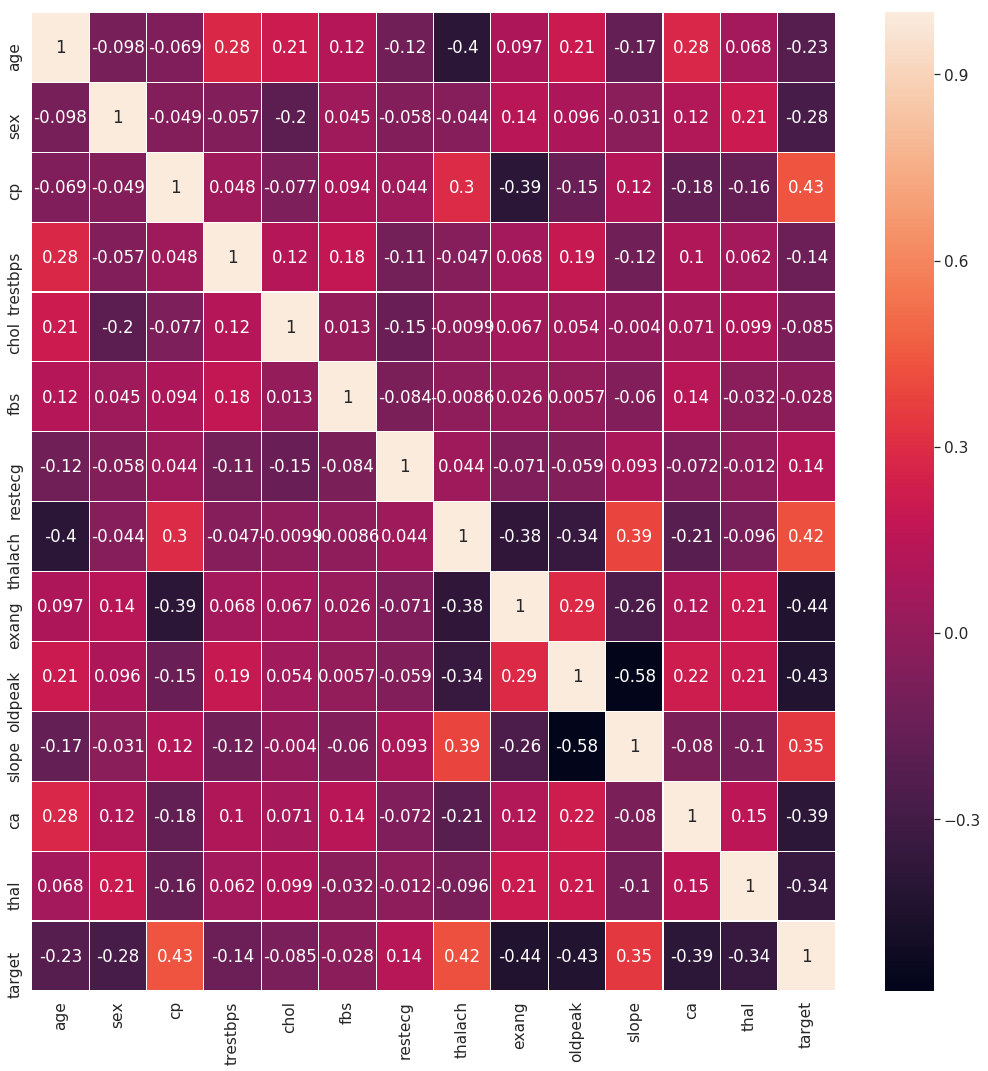

In [31]:
plt.figure(figsize=(18,18))
plt.rcParams["axes.labelsize"] = 20
sns.set(font_scale=1.4)
sns.heatmap(df.corr(), annot = True ,linewidths=.1)
plt.show()

In [32]:
def find_correlation(data, threshold=0.9):
    corr_mat = data.corr()
    corr_mat.loc[:, :] = np.tril(corr_mat, k=-1)
    already_in = set()
    result = []
    for col in corr_mat:
        perfect_corr = corr_mat[col][abs(corr_mat[col])> threshold].index.tolist()
        if perfect_corr and col not in already_in:
            already_in.update(set(perfect_corr))
            perfect_corr.append(col)
            result.append(perfect_corr)
    select_nested = [f[1:] for f in result]
    select_flat = [i for j in select_nested for i in j]
    return select_flat

In [33]:
columns_to_drop = find_correlation(df.drop(columns=['target']) , 0.2)
df4 = df.drop(columns=columns_to_drop)

In [34]:
df4

trestbps  fbs  restecg  slope  thal  target
0         145    1        0      0     1       1
1         130    0        1      0     2       1
2         130    0        0      2     2       1
3         120    0        1      2     2       1
4         120    0        1      2     2       1
5         140    0        1      1     1       1
6         140    0        0      1     2       1
7         120    0        1      2     3       1
8         172    1        1      2     3       1
9         150    0        1      2     2       1
10        140    0        1      2     2       1
11        130    0        1      2     2       1
12        130    0        1      2     2       1
13        110    0        0      1     2       1
14        150    1        0      2     2       1
15        120    0        1      1     2       1
16        120    0        1      2     2       1
17        150    0        1      0     2       1
18        150    0        1      2     2       1
19        140    0        1      2     2       1
20        135    0        1      1     3       1
21        130    0        1      2     2       1
22        140    0        1      2     2       1
23        150    1        1      1     2       1
24        140    0        1      2     3       1
25        160    0        1      2     2       1
26        150    1        1      2     2       1
27        110    0        1      2     2       1
28        140    1        0      2     2       1
29        130    1        0      0     2       1
..        ...  ...      ...    ...   ...     ...
273       100    0        1      2     3       0
274       110    0        0      1     2       0
275       125    0        1      2     3       0
276       146    0        1      1     3       0
277       124    0        1      2     3       0
278       136    1        0      2     2       0
279       138    0        0      1     2       0
280       136    0        1      1     1       0
281       128    1        1      1     0       0
282       126    1        1      1     1       0
283       152    0        1      2     3       0
284       140    0        0      2     3       0
285       140    0        1      1     3       0
286       134    0        1      2     2       0
287       154    0        0      2     2       0
288       110    0        1      1     3       0
289       128    0        2      1     3       0
290       148    0        1      2     3       0
291       114    0        2      0     1       0
292       170    1        0      1     1       0
293       152    0        0      1     3       0
294       120    0        1      0     1       0
295       140    0        0      2     3       0
296       124    0        1      1     2       0
297       164    1        0      1     1       0
298       140    0        1      1     3       0
299       110    0        1      1     3       0
300       144    1        1      1     3       0
301       130    0        1      1     3       0
302       130    0        0      1     2       0

[303 rows x 6 columns]

In [35]:
corr = df.corr()
linear_features=abs(corr).target.drop('target').sort_values(ascending=False)[:5].keys()

In [36]:
corr

age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.098447 -0.068653  0.279351  0.213678  0.121308   
sex      -0.098447  1.000000 -0.049353 -0.056769 -0.197912  0.045032   
cp       -0.068653 -0.049353  1.000000  0.047608 -0.076904  0.094444   
trestbps  0.279351 -0.056769  0.047608  1.000000  0.123174  0.177531   
chol      0.213678 -0.197912 -0.076904  0.123174  1.000000  0.013294   
fbs       0.121308  0.045032  0.094444  0.177531  0.013294  1.000000   
restecg  -0.116211 -0.058196  0.044421 -0.114103 -0.151040 -0.084189   
thalach  -0.398522 -0.044020  0.295762 -0.046698 -0.009940 -0.008567   
exang     0.096801  0.141664 -0.394280  0.067616  0.067023  0.025665   
oldpeak   0.210013  0.096093 -0.149230  0.193216  0.053952  0.005747   
slope    -0.168814 -0.030711  0.119717 -0.121475 -0.004038 -0.059894   
ca        0.276326  0.118261 -0.181053  0.101389  0.070511  0.137979   
thal      0.068001  0.210041 -0.161736  0.062210  0.098803 -0.032019   
target   -0.225439 -0.280937  0.433798 -0.144931 -0.085239 -0.028046   

           restecg   thalach     exang   oldpeak     slope        ca  \
age      -0.116211 -0.398522  0.096801  0.210013 -0.168814  0.276326   
sex      -0.058196 -0.044020  0.141664  0.096093 -0.030711  0.118261   
cp        0.044421  0.295762 -0.394280 -0.149230  0.119717 -0.181053   
trestbps -0.114103 -0.046698  0.067616  0.193216 -0.121475  0.101389   
chol     -0.151040 -0.009940  0.067023  0.053952 -0.004038  0.070511   
fbs      -0.084189 -0.008567  0.025665  0.005747 -0.059894  0.137979   
restecg   1.000000  0.044123 -0.070733 -0.058770  0.093045 -0.072042   
thalach   0.044123  1.000000 -0.378812 -0.344187  0.386784 -0.213177   
exang    -0.070733 -0.378812  1.000000  0.288223 -0.257748  0.115739   
oldpeak  -0.058770 -0.344187  0.288223  1.000000 -0.577537  0.222682   
slope     0.093045  0.386784 -0.257748 -0.577537  1.000000 -0.080155   
ca       -0.072042 -0.213177  0.115739  0.222682 -0.080155  1.000000   
thal     -0.011981 -0.096439  0.206754  0.210244 -0.104764  0.151832   
target    0.137230  0.421741 -0.436757 -0.430696  0.345877 -0.391724   

              thal    target  
age       0.068001 -0.225439  
sex       0.210041 -0.280937  
cp       -0.161736  0.433798  
trestbps  0.062210 -0.144931  
chol      0.098803 -0.085239  
fbs      -0.032019 -0.028046  
restecg  -0.011981  0.137230  
thalach  -0.096439  0.421741  
exang     0.206754 -0.436757  
oldpeak   0.210244 -0.430696  
slope    -0.104764  0.345877  
ca        0.151832 -0.391724  
thal      1.000000 -0.344029  
target   -0.344029  1.000000

In [37]:
abs(corr)

age       sex        cp  trestbps      chol       fbs  \
age       1.000000  0.098447  0.068653  0.279351  0.213678  0.121308   
sex       0.098447  1.000000  0.049353  0.056769  0.197912  0.045032   
cp        0.068653  0.049353  1.000000  0.047608  0.076904  0.094444   
trestbps  0.279351  0.056769  0.047608  1.000000  0.123174  0.177531   
chol      0.213678  0.197912  0.076904  0.123174  1.000000  0.013294   
fbs       0.121308  0.045032  0.094444  0.177531  0.013294  1.000000   
restecg   0.116211  0.058196  0.044421  0.114103  0.151040  0.084189   
thalach   0.398522  0.044020  0.295762  0.046698  0.009940  0.008567   
exang     0.096801  0.141664  0.394280  0.067616  0.067023  0.025665   
oldpeak   0.210013  0.096093  0.149230  0.193216  0.053952  0.005747   
slope     0.168814  0.030711  0.119717  0.121475  0.004038  0.059894   
ca        0.276326  0.118261  0.181053  0.101389  0.070511  0.137979   
thal      0.068001  0.210041  0.161736  0.062210  0.098803  0.032019   
target    0.225439  0.280937  0.433798  0.144931  0.085239  0.028046   

           restecg   thalach     exang   oldpeak     slope        ca  \
age       0.116211  0.398522  0.096801  0.210013  0.168814  0.276326   
sex       0.058196  0.044020  0.141664  0.096093  0.030711  0.118261   
cp        0.044421  0.295762  0.394280  0.149230  0.119717  0.181053   
trestbps  0.114103  0.046698  0.067616  0.193216  0.121475  0.101389   
chol      0.151040  0.009940  0.067023  0.053952  0.004038  0.070511   
fbs       0.084189  0.008567  0.025665  0.005747  0.059894  0.137979   
restecg   1.000000  0.044123  0.070733  0.058770  0.093045  0.072042   
thalach   0.044123  1.000000  0.378812  0.344187  0.386784  0.213177   
exang     0.070733  0.378812  1.000000  0.288223  0.257748  0.115739   
oldpeak   0.058770  0.344187  0.288223  1.000000  0.577537  0.222682   
slope     0.093045  0.386784  0.257748  0.577537  1.000000  0.080155   
ca        0.072042  0.213177  0.115739  0.222682  0.080155  1.000000   
thal      0.011981  0.096439  0.206754  0.210244  0.104764  0.151832   
target    0.137230  0.421741  0.436757  0.430696  0.345877  0.391724   

              thal    target  
age       0.068001  0.225439  
sex       0.210041  0.280937  
cp        0.161736  0.433798  
trestbps  0.062210  0.144931  
chol      0.098803  0.085239  
fbs       0.032019  0.028046  
restecg   0.011981  0.137230  
thalach   0.096439  0.421741  
exang     0.206754  0.436757  
oldpeak   0.210244  0.430696  
slope     0.104764  0.345877  
ca        0.151832  0.391724  
thal      1.000000  0.344029  
target    0.344029  1.000000

In [38]:
abs(corr).target

age         0.225439
sex         0.280937
cp          0.433798
trestbps    0.144931
chol        0.085239
fbs         0.028046
restecg     0.137230
thalach     0.421741
exang       0.436757
oldpeak     0.430696
slope       0.345877
ca          0.391724
thal        0.344029
target      1.000000
Name: target, dtype: float64

In [39]:
abs(corr).target.drop('target')

age         0.225439
sex         0.280937
cp          0.433798
trestbps    0.144931
chol        0.085239
fbs         0.028046
restecg     0.137230
thalach     0.421741
exang       0.436757
oldpeak     0.430696
slope       0.345877
ca          0.391724
thal        0.344029
Name: target, dtype: float64

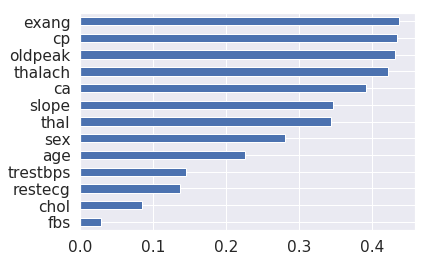

In [40]:
abs(corr).target.drop('target').sort_values().plot(kind='barh')

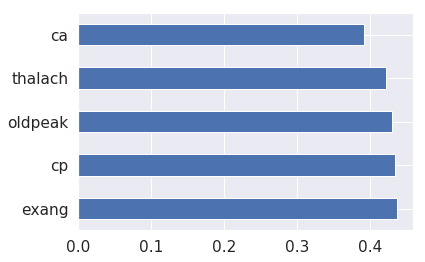

In [41]:
abs(corr).target.drop('target').sort_values(ascending=False)[:5].plot(kind='barh')

In [42]:
abs(corr).target.drop('target').sort_values(ascending=False)[:5].keys()

Index([u'exang', u'cp', u'oldpeak', u'thalach', u'ca'], dtype='object')

<h3>Using Random Forest Classifier to Identify Important Features

In [43]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
y = df.copy(deep=True)['target']
model = rf.fit(df.drop('target', axis=1),y)

/home/deshanig/.local/lib/python2.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


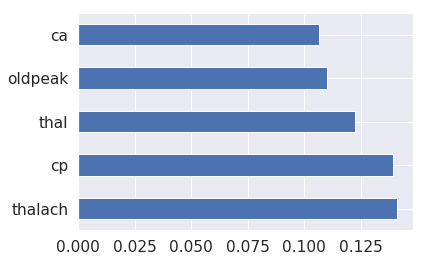

In [44]:
importance = rf.feature_importances_
feat_importances_act = pd.Series(importance, index=df.drop('target', axis=1).columns)
feat_importances = feat_importances_act.nlargest(5)
feat_importances.plot(kind='barh')

<h3>Convert Categorical Variables into Dummy Variables

In [45]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [46]:
df['sex'] = df['sex'].astype('object')
df['cp'] = df['cp'].astype('object')
df['fbs'] = df['fbs'].astype('object')
df['restecg'] = df['restecg'].astype('object')
df['exang'] = df['exang'].astype('object')
df['slope'] = df['slope'].astype('object')
df['thal'] = df['thal'].astype('object')
df.dtypes

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs          object
restecg      object
thalach       int64
exang        object
oldpeak     float64
slope        object
ca            int64
thal         object
target        int64
dtype: object

In [47]:
df.head(10)

age sex cp  trestbps  chol fbs restecg  thalach exang  oldpeak slope  ca  \
0   63   1  3       145   233   1       0      150     0      2.3     0   0   
1   37   1  2       130   250   0       1      187     0      3.5     0   0   
2   41   0  1       130   204   0       0      172     0      1.4     2   0   
3   56   1  1       120   236   0       1      178     0      0.8     2   0   
4   57   0  0       120   354   0       1      163     1      0.6     2   0   
5   57   1  0       140   192   0       1      148     0      0.4     1   0   
6   56   0  1       140   294   0       0      153     0      1.3     1   0   
7   44   1  1       120   263   0       1      173     0      0.0     2   0   
8   52   1  2       172   199   1       1      162     0      0.5     2   0   
9   57   1  2       150   168   0       1      174     0      1.6     2   0   

  thal  target  
0    1       1  
1    2       1  
2    2       1  
3    2       1  
4    2       1  
5    1       1  
6    2       1  
7    3       1  
8    3       1  
9    2       1

In [48]:
df = pd.get_dummies(df, drop_first=True)
df.head(10)

age  trestbps  chol  thalach  oldpeak  ca  target  sex_1  cp_1  cp_2  cp_3  \
0   63       145   233      150      2.3   0       1      1     0     0     1   
1   37       130   250      187      3.5   0       1      1     0     1     0   
2   41       130   204      172      1.4   0       1      0     1     0     0   
3   56       120   236      178      0.8   0       1      1     1     0     0   
4   57       120   354      163      0.6   0       1      0     0     0     0   
5   57       140   192      148      0.4   0       1      1     0     0     0   
6   56       140   294      153      1.3   0       1      0     1     0     0   
7   44       120   263      173      0.0   0       1      1     1     0     0   
8   52       172   199      162      0.5   0       1      1     0     1     0   
9   57       150   168      174      1.6   0       1      1     0     1     0   

   fbs_1  restecg_1  restecg_2  exang_1  slope_1  slope_2  thal_1  thal_2  \
0      1          0          0        0        0        0       1       0   
1      0          1          0        0        0        0       0       1   
2      0          0          0        0        0        1       0       1   
3      0          1          0        0        0        1       0       1   
4      0          1          0        1        0        1       0       1   
5      0          1          0        0        1        0       1       0   
6      0          0          0        0        1        0       0       1   
7      0          1          0        0        0        1       0       0   
8      1          1          0        0        0        1       0       0   
9      0          1          0        0        0        1       0       1   

   thal_3  
0       0  
1       0  
2       0  
3       0  
4       0  
5       0  
6       0  
7       1  
8       1  
9       0